In [1]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn.metrics as metrics
import warnings

In [2]:
adnimerge = pd.read_csv('data2-test.csv') # Read all data
adnimerge.head()

,RID,Label,EXAMDATE,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,...,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT,S_HDL_TG_PCT
0,2,CN,2013/9/9,3.485250,2.097366,0.813088,0.296150,1.807508,1.284279,1.387884,...,45.795997,51.489219,43.459352,8.029866,2.714785,56.144775,40.990652,31.944618,9.046034,2.864573
1,2,CN,2010/9/22,3.321836,2.207001,0.817763,0.345738,1.896339,1.389238,1.114835,...,46.005582,50.615528,43.084242,7.531286,3.378890,55.245382,41.262698,32.276028,8.986670,3.491920
2,2,CN,2012/9/26,3.669880,2.420754,0.872882,0.351863,2.111525,1.547872,1.249126,...,45.385404,51.463731,43.590843,7.872888,3.150865,54.948029,41.636276,32.319041,9.317236,3.415694
3,2,CN,2011/9/19,3.854019,2.644999,0.929255,0.394748,2.313184,1.715744,1.209020,...,45.104345,51.429658,43.554041,7.875616,3.465997,54.641829,41.751099,32.428376,9.322723,3.607073
4,3,AD,2005/9/12,5.278259,3.894218,1.615564,0.743056,3.193485,2.278654,1.384041,...,45.527953,49.865292,41.168720,8.696572,4.606755,54.801008,40.736254,30.451143,10.285111,4.462738


In [3]:
adnimerge.describe()

,RID,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,TOTAL_TG,VLDL_TG,...,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT,S_HDL_TG_PCT
count,4890.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,...,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000
mean,2327.298364,4.959633,3.422341,1.469652,0.619657,2.803841,1.952689,1.537292,1.176128,0.801560,...,45.685613,50.482173,41.749796,8.732378,3.832214,55.739470,40.510160,30.242395,10.267765,3.750370
std,1881.963240,0.988311,0.839890,0.402316,0.236969,0.737981,0.462004,0.380297,0.537638,0.452058,...,0.997181,2.539977,2.243293,0.620418,1.665485,1.271873,1.802984,1.805133,0.507577,1.263897
min,2.000000,2.174928,1.217649,0.392015,0.052258,0.649604,0.618360,0.660952,0.379330,0.172669,...,42.577593,31.696969,22.734165,6.237439,0.007404,50.738389,23.041319,8.490338,8.751211,0.074534
25%,650.750000,4.252770,2.816714,1.180249,0.446524,2.280425,1.622159,1.255391,0.783223,0.466565,...,45.035171,49.097075,40.578628,8.327400,2.666406,54.884814,39.490130,29.254095,9.937191,2.911612
50%,1309.000000,4.897479,3.345351,1.430411,0.591048,2.741082,1.914988,1.484115,1.044447,0.681637,...,45.628016,50.723665,42.008177,8.748937,3.654706,55.706108,40.679946,30.452169,10.206770,3.658046
75%,4388.000000,5.588693,3.951129,1.723265,0.764922,3.278069,2.250857,1.764738,1.444421,1.034183,...,46.219464,52.181143,43.267781,9.145341,4.770215,56.533573,41.666339,31.414557,10.526756,4.504006
max,5296.000000,9.138403,6.994300,3.298031,1.927663,6.122233,4.108189,3.599480,5.169233,3.987639,...,50.964491,57.346756,47.265847,11.074756,18.498166,61.173578,46.161229,34.951396,14.552828,17.313669


In [4]:
adnimerge['Label'].value_counts() # Review target distribution

LMCI    1804
CN      1351
EMCI     854
AD       692
SMC      189
Name: Label, dtype: int64

In [5]:
# View all data sizes
adnimerge.shape

(4890, 253)

In [6]:
# Missing value count
for col in adnimerge.columns:
    print(col, adnimerge[col].isnull().sum())

RID 0
Label 0
EXAMDATE 0
TOTAL_C 15
NON_HDL_C 15
REMNANT_C 15
VLDL_C 15
CLINICAL_LDL_C 15
LDL_C 15
HDL_C 15
TOTAL_TG 15
VLDL_TG 15
LDL_TG 15
HDL_TG 15
TOTAL_PL 15
VLDL_PL 15
LDL_PL 15
HDL_PL 15
TOTAL_CE 15
VLDL_CE 15
LDL_CE 15
HDL_CE 15
TOTAL_FC 15
VLDL_FC 15
LDL_FC 15
HDL_FC 15
TOTAL_L 15
VLDL_L 15
LDL_L 15
HDL_L 15
TOTAL_P 15
VLDL_P 15
LDL_P 15
HDL_P 15
VLDL_SIZE 15
LDL_SIZE 15
HDL_SIZE 15
PHOSPHOGLYC 17
TG_BY_PG 17
CHOLINES 17
PHOSPHATIDYLC 17
SPHINGOMYELINS 17
APOB 15
APOA1 15
APOB_BY_APOA1 15
TOTAL_FA 17
UNSATURATION 17
OMEGA_3 17
OMEGA_6 17
PUFA 17
MUFA 17
SFA 17
LA 17
DHA 17
OMEGA_3_PCT 17
OMEGA_6_PCT 17
PUFA_PCT 17
MUFA_PCT 17
SFA_PCT 17
LA_PCT 17
DHA_PCT 17
PUFA_BY_MUFA 17
OMEGA_6_BY_OMEGA_3 17
ALA 15
GLN 15
GLY 17
HIS 16
TOTAL_BCAA 15
ILE 15
LEU 15
VAL 15
PHE 15
TYR 17
GLUCOSE 17
LACTATE 26
PYRUVATE 17
CITRATE 15
GLYCEROL 17
BOHBUTYRATE 15
ACETATE 15
ACETOACETATE 15
ACETONE 15
CREATININE 22
ALBUMIN 15
GLYCA 15
XXL_VLDL_P 15
XXL_VLDL_L 15
XXL_VLDL_PL 15
XXL_VLDL_C 15
XXL_VLDL_

In [7]:
data=adnimerge

In [8]:
cols_with_na=[]

for column in data:
    if data[column].isnull().any()==True:
        cols_with_na.append(column)

# Average Fill
meandf = data.copy()
for col in cols_with_na:
    if data[col].dtype=='float64':
        meandf[col] = data[col].fillna(data[col].mean())
    else: #For non-numeric data
        meandf[col] = data[col].fillna(data[col].mode()[0])
        
np.any(pd.isnull(meandf)) # If 'False', confirm that meandf is now Nan-free

False

In [9]:
meandf.head()

,RID,Label,EXAMDATE,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,...,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT,S_HDL_TG_PCT
0,2,CN,2013/9/9,3.485250,2.097366,0.813088,0.296150,1.807508,1.284279,1.387884,...,45.795997,51.489219,43.459352,8.029866,2.714785,56.144775,40.990652,31.944618,9.046034,2.864573
1,2,CN,2010/9/22,3.321836,2.207001,0.817763,0.345738,1.896339,1.389238,1.114835,...,46.005582,50.615528,43.084242,7.531286,3.378890,55.245382,41.262698,32.276028,8.986670,3.491920
2,2,CN,2012/9/26,3.669880,2.420754,0.872882,0.351863,2.111525,1.547872,1.249126,...,45.385404,51.463731,43.590843,7.872888,3.150865,54.948029,41.636276,32.319041,9.317236,3.415694
3,2,CN,2011/9/19,3.854019,2.644999,0.929255,0.394748,2.313184,1.715744,1.209020,...,45.104345,51.429658,43.554041,7.875616,3.465997,54.641829,41.751099,32.428376,9.322723,3.607073
4,3,AD,2005/9/12,5.278259,3.894218,1.615564,0.743056,3.193485,2.278654,1.384041,...,45.527953,49.865292,41.168720,8.696572,4.606755,54.801008,40.736254,30.451143,10.285111,4.462738


In [10]:
# Map and code the target
mapping = {
           'CN': 0,
           'AD': 1,
           'LMCI': 2,
           'EMCI':2,
           'SMC':2
}
meandf['Label'] =meandf['Label'].map(mapping)
meandf.head()

,RID,Label,EXAMDATE,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,...,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT,S_HDL_TG_PCT
0,2,0,2013/9/9,3.485250,2.097366,0.813088,0.296150,1.807508,1.284279,1.387884,...,45.795997,51.489219,43.459352,8.029866,2.714785,56.144775,40.990652,31.944618,9.046034,2.864573
1,2,0,2010/9/22,3.321836,2.207001,0.817763,0.345738,1.896339,1.389238,1.114835,...,46.005582,50.615528,43.084242,7.531286,3.378890,55.245382,41.262698,32.276028,8.986670,3.491920
2,2,0,2012/9/26,3.669880,2.420754,0.872882,0.351863,2.111525,1.547872,1.249126,...,45.385404,51.463731,43.590843,7.872888,3.150865,54.948029,41.636276,32.319041,9.317236,3.415694
3,2,0,2011/9/19,3.854019,2.644999,0.929255,0.394748,2.313184,1.715744,1.209020,...,45.104345,51.429658,43.554041,7.875616,3.465997,54.641829,41.751099,32.428376,9.322723,3.607073
4,3,1,2005/9/12,5.278259,3.894218,1.615564,0.743056,3.193485,2.278654,1.384041,...,45.527953,49.865292,41.168720,8.696572,4.606755,54.801008,40.736254,30.451143,10.285111,4.462738


In [11]:
meandf.isnull().sum()

RID             0
Label           0
EXAMDATE        0
TOTAL_C         0
NON_HDL_C       0
               ..
S_HDL_PL_PCT    0
S_HDL_C_PCT     0
S_HDL_CE_PCT    0
S_HDL_FC_PCT    0
S_HDL_TG_PCT    0
Length: 253, dtype: int64

In [12]:
X=meandf.drop(['RID','Label','EXAMDATE',],axis=1)#Separate RID, tag, test time and other non-data information
y=meandf['Label']#Label information
X

,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,TOTAL_TG,VLDL_TG,LDL_TG,...,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT,S_HDL_TG_PCT
0,3.485250,2.097366,0.813088,0.296150,1.807508,1.284279,1.387884,0.696761,0.488012,0.083330,...,45.795997,51.489219,43.459352,8.029866,2.714785,56.144775,40.990652,31.944618,9.046034,2.864573
1,3.321836,2.207001,0.817763,0.345738,1.896339,1.389238,1.114835,0.933453,0.716704,0.086775,...,46.005582,50.615528,43.084242,7.531286,3.378890,55.245382,41.262698,32.276028,8.986670,3.491920
2,3.669880,2.420754,0.872882,0.351863,2.111525,1.547872,1.249126,0.888361,0.633832,0.105334,...,45.385404,51.463731,43.590843,7.872888,3.150865,54.948029,41.636276,32.319041,9.317236,3.415694
3,3.854019,2.644999,0.929255,0.394748,2.313184,1.715744,1.209020,1.071522,0.802571,0.110335,...,45.104345,51.429658,43.554041,7.875616,3.465997,54.641829,41.751099,32.428376,9.322723,3.607073
4,5.278259,3.894218,1.615564,0.743056,3.193485,2.278654,1.384041,1.768261,1.332795,0.176774,...,45.527953,49.865292,41.168720,8.696572,4.606755,54.801008,40.736254,30.451143,10.285111,4.462738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,6.589220,5.202977,2.141722,0.965819,4.461336,3.061255,1.386244,1.576522,1.194546,0.182345,...,44.817405,52.421333,43.200910,9.220424,2.761262,53.127354,43.211803,32.326921,10.884882,3.660843
4886,4.982812,3.770883,1.679500,0.824788,3.013481,2.091383,1.211929,1.724665,1.309729,0.168485,...,46.091472,48.832743,40.483171,8.349573,5.075785,54.709746,40.495849,30.353361,10.142488,4.794405
4887,8.622977,6.400805,2.720519,1.089305,5.497715,3.680286,2.222172,1.535007,0.962994,0.238834,...,45.056064,51.074857,41.323095,9.751762,3.869079,55.494467,40.990893,30.136517,10.854376,3.514640
4888,8.210898,6.002923,2.578051,1.033229,5.123625,3.424871,2.207976,1.596433,0.978608,0.258305,...,45.255041,50.573464,40.816183,9.757281,4.171495,55.593292,40.578842,29.596180,10.982662,3.827866


In [13]:
col = X.columns[:-1]# .columns Give the column name in the data
print(col)
X=pd.DataFrame(X,columns=col)
X.describe()

Index(['TOTAL_C', 'NON_HDL_C', 'REMNANT_C', 'VLDL_C', 'CLINICAL_LDL_C',
       'LDL_C', 'HDL_C', 'TOTAL_TG', 'VLDL_TG', 'LDL_TG',
       ...
       'L_HDL_TG_PCT', 'M_HDL_PL_PCT', 'M_HDL_C_PCT', 'M_HDL_CE_PCT',
       'M_HDL_FC_PCT', 'M_HDL_TG_PCT', 'S_HDL_PL_PCT', 'S_HDL_C_PCT',
       'S_HDL_CE_PCT', 'S_HDL_FC_PCT'],
      dtype='object', length=249)


,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,TOTAL_TG,VLDL_TG,LDL_TG,...,L_HDL_TG_PCT,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT
count,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,...,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000
mean,4.959633,3.422341,1.469652,0.619657,2.803841,1.952689,1.537292,1.176128,0.801560,0.153476,...,4.036338,45.685613,50.482173,41.749796,8.732378,3.832214,55.739470,40.510160,30.242395,10.267765
std,0.986793,0.838600,0.401698,0.236605,0.736848,0.461295,0.379713,0.536813,0.451364,0.039012,...,3.749159,0.995651,2.536077,2.239849,0.619465,1.662928,1.269921,1.800216,1.802362,0.506797
min,2.174928,1.217649,0.392015,0.052258,0.649604,0.618360,0.660952,0.379330,0.172669,0.062549,...,0.004039,42.577593,31.696969,22.734165,6.237439,0.007404,50.738389,23.041319,8.490338,8.751211
25%,4.254071,2.819545,1.180870,0.446879,2.282652,1.623590,1.255974,0.783861,0.466956,0.126413,...,2.282358,45.036733,49.102651,40.584215,8.328553,2.667709,54.888349,39.493352,29.259084,9.937683
50%,4.904334,3.348731,1.431284,0.592014,2.744294,1.916723,1.485504,1.046315,0.684030,0.146902,...,3.306024,45.629802,50.714135,42.001274,8.747013,3.661444,55.714234,40.672890,30.448917,10.208860
75%,5.585581,3.948659,1.722292,0.763658,3.277485,2.248268,1.764260,1.443868,1.032438,0.173309,...,4.777647,46.214916,52.173433,43.257865,9.142836,4.767765,56.531231,41.664812,31.411940,10.525670
max,9.138403,6.994300,3.298031,1.927663,6.122233,4.108189,3.599480,5.169233,3.987639,0.449523,...,99.163421,50.964491,57.346756,47.265847,11.074756,18.498166,61.173578,46.161229,34.951396,14.552828


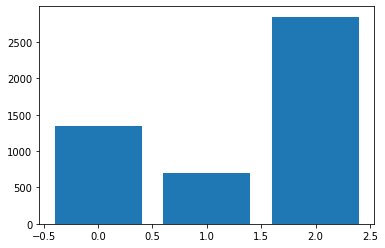

In [14]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

In [15]:
# # Split data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

In [16]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#r0s = RandomUnderSampler(random_state=0, replacement=True)  # Use random undersampling (down sampling)
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(6381, 249) (6381,)


In [18]:
# # Feature scaling, normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
col = X.columns# .columns Give the column name in the data
print(col)
X_train=pd.DataFrame(X_train,columns=col)
X_train.describe()

Index(['TOTAL_C', 'NON_HDL_C', 'REMNANT_C', 'VLDL_C', 'CLINICAL_LDL_C',
       'LDL_C', 'HDL_C', 'TOTAL_TG', 'VLDL_TG', 'LDL_TG',
       ...
       'L_HDL_TG_PCT', 'M_HDL_PL_PCT', 'M_HDL_C_PCT', 'M_HDL_CE_PCT',
       'M_HDL_FC_PCT', 'M_HDL_TG_PCT', 'S_HDL_PL_PCT', 'S_HDL_C_PCT',
       'S_HDL_CE_PCT', 'S_HDL_FC_PCT'],
      dtype='object', length=249)


,TOTAL_C,NON_HDL_C,REMNANT_C,VLDL_C,CLINICAL_LDL_C,LDL_C,HDL_C,TOTAL_TG,VLDL_TG,LDL_TG,...,L_HDL_TG_PCT,M_HDL_PL_PCT,M_HDL_C_PCT,M_HDL_CE_PCT,M_HDL_FC_PCT,M_HDL_TG_PCT,S_HDL_PL_PCT,S_HDL_C_PCT,S_HDL_CE_PCT,S_HDL_FC_PCT
count,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,...,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000
mean,0.397550,0.381683,0.390168,0.302369,0.393788,0.382300,0.310345,0.165940,0.160807,0.230447,...,0.041025,0.368110,0.732121,0.774965,0.515353,0.208319,0.477161,0.783335,0.821612,0.262838
std,0.145119,0.147345,0.148299,0.126291,0.136249,0.133631,0.133536,0.110567,0.116673,0.103246,...,0.037261,0.119180,0.100781,0.094053,0.129012,0.092801,0.122930,0.084043,0.072808,0.091163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290730,0.272430,0.282863,0.210082,0.295745,0.284679,0.213764,0.085891,0.074298,0.158695,...,0.023073,0.291194,0.679390,0.728521,0.432292,0.144820,0.393001,0.740884,0.785135,0.203773
50%,0.388344,0.368516,0.375666,0.288168,0.384359,0.374192,0.293069,0.138435,0.129573,0.213002,...,0.033699,0.360578,0.742889,0.784674,0.518713,0.198049,0.472707,0.789926,0.829796,0.251061
75%,0.489883,0.473441,0.485655,0.378926,0.479225,0.467774,0.389826,0.220479,0.220797,0.281439,...,0.048360,0.429829,0.797812,0.837837,0.601243,0.258039,0.555121,0.836116,0.866472,0.308574
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Accuracy score is proportional to the number of correct classification
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #50% cross validation
rfecv = rfecv.fit(X_train, y_train)
y_train_pred = rfecv.predict(X_train)
y_test_pred = rfecv.predict(X_test)



NameError: name 'confusion_matrix' is not defined

Confusion Matrix:
[[ 45   1 301]
 [  4   6 146]
 [ 19   1 700]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.13      0.22       347
           1       0.75      0.04      0.07       156
           2       0.61      0.97      0.75       720

    accuracy                           0.61      1223
   macro avg       0.67      0.38      0.35      1223
weighted avg       0.64      0.61      0.51      1223

Accuracy: 0.6140637775960752


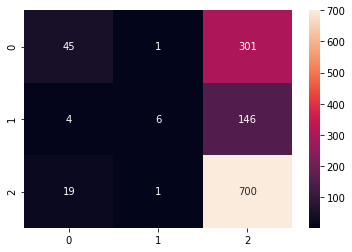

In [17]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

#
result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [18]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

Optimal number of features : 114
Best features : Int64Index([ 10,  21,  32,  33,  34,  37,  38,  41,  42,  43,
            ...
            232, 233, 235, 236, 237, 240, 241, 243, 245, 248],
           dtype='int64', length=114)


In [21]:
rfecv.cv_results_['mean_test_score'][rfecv.n_features_]

0.5917650207612328

In [24]:
from sklearn.ensemble import RandomForestClassifier#Random forest

classifier = RandomForestClassifier(random_state=10, n_estimators=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import classification_report


result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.20      0.29       347
           1       0.35      0.09      0.14       156
           2       0.62      0.90      0.73       720

    accuracy                           0.60      1223
   macro avg       0.50      0.40      0.39      1223
weighted avg       0.56      0.60      0.53      1223

Accuracy: 0.6001635322976288


In [17]:
# xgb
import xgboost as xgb
params = {
    'objective': 'multi:softmax', 'num_class' : 3
}


dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model_xgb = xgb.train(params, dtrain, num_rounds)
dtest = xgb.DMatrix(X_test)
test_pred = model_xgb.predict(dtest)


measure_result = classification_report(y_test, test_pred)
print('measure_result = \n', measure_result)

measure_result = 
               precision    recall  f1-score   support

           0       0.48      0.23      0.31       347
           1       0.43      0.13      0.20       156
           2       0.63      0.88      0.73       720

    accuracy                           0.60      1223
   macro avg       0.51      0.41      0.42      1223
weighted avg       0.56      0.60      0.54      1223



In [17]:
x_columns = []
for X in data.columns:
    #According to the actual situation of data, select all compound columns as x_ columns
    if X not in ['RID', 'Label','EXAMDATE']:
        x_columns.append(X)


#Calculate feature importance and sort
imp = classifier.feature_importances_
imp = imp.tolist()
imp_dict = {}
for i in range(len(imp)):
    imp_dict[x_columns[i]] = imp[i]
imp_ordered_dict = sorted(imp_dict.items(),key=lambda x:x[1],reverse=False)
imp_ordered_dict

[('XL_VLDL_L', 0.002002766700000585),
 ('VLDL_CE', 0.0024182615172239686),
 ('L_VLDL_P', 0.002547195380278132),
 ('VLDL_PL', 0.002569098268716687),
 ('CLINICAL_LDL_C', 0.0026126233734386412),
 ('APOA1', 0.0026162720547004952),
 ('TOTAL_CE', 0.002659551482448648),
 ('XL_VLDL_PL', 0.0026760424568899642),
 ('VLDL_L', 0.0026863554893844827),
 ('L_VLDL_FC', 0.0026955459713663243),
 ('M_HDL_FC', 0.002699347283040401),
 ('LDL_P', 0.0027007639102788923),
 ('TOTAL_L', 0.002706328542788838),
 ('HDL_CE', 0.002706370444712304),
 ('XL_VLDL_CE', 0.002714389406812609),
 ('S_HDL_TG_PCT', 0.0027234712215512243),
 ('VLDL_P', 0.0027344880463090106),
 ('TOTAL_C', 0.002744368973714342),
 ('L_LDL_PL', 0.002747383428879398),
 ('VLDL_FC', 0.0027699115883630977),
 ('LDL_FC', 0.002788599065584653),
 ('L_VLDL_CE', 0.0028201170646334466),
 ('XL_VLDL_FC', 0.002822447458338233),
 ('L_LDL_L', 0.0028283538368124744),
 ('M_VLDL_TG', 0.002830797023922911),
 ('M_LDL_FC', 0.0028352279840429023),
 ('L_VLDL_C', 0.002899764

In [17]:
# Decision tree classification
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train) 
test_pred = clf.predict(X_test)

measure_result = classification_report(y_test, test_pred)
print('measure_result = \n', measure_result)

measure_result = 
               precision    recall  f1-score   support

           0       0.33      0.28      0.30       276
           1       0.13      0.16      0.15       118
           2       0.40      0.44      0.42       365
           3       0.26      0.22      0.23       181
           4       0.05      0.05      0.05        38

    accuracy                           0.30       978
   macro avg       0.23      0.23      0.23       978
weighted avg       0.31      0.30      0.30       978



In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)


measure_result = classification_report(y_test, test_pred)
print('measure_result = \n', measure_result)

measure_result = 
               precision    recall  f1-score   support

           0       0.41      0.33      0.36       276
           1       0.35      0.16      0.22       118
           2       0.44      0.68      0.53       365
           3       0.33      0.23      0.27       181
           4       0.58      0.18      0.28        38

    accuracy                           0.41       978
   macro avg       0.42      0.31      0.33       978
weighted avg       0.40      0.41      0.39       978



D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Linear separable support vector machine
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)


clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)


measure_result = classification_report(y_test, test_pred)
print('measure_result = \n', measure_result)

measure_result = 
               precision    recall  f1-score   support

           0       0.36      0.24      0.29       276
           1       0.26      0.08      0.13       118
           2       0.42      0.69      0.53       365
           3       0.33      0.28      0.31       181
           4       0.50      0.03      0.05        38

    accuracy                           0.39       978
   macro avg       0.37      0.27      0.26       978
weighted avg       0.37      0.39      0.35       978



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
